In [1]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

In [4]:
# Subsetting Data Analyst job postings then exploding job_skills column
df_explode = df.loc[df["job_title_short"] == "Data Analyst"].explode("job_skills")

In [5]:
skills_stats = df_explode.groupby("job_skills").agg(
    skill_count=("job_skills", "count"), median_salary=("salary_year_avg", "median")
)
skills_stats_top10 = skills_stats.sort_values("skill_count", ascending=False).head(10)
skills_stats_top10

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


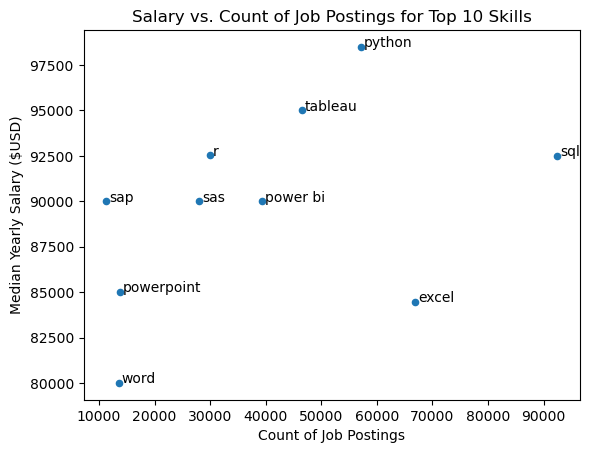

In [13]:
skills_stats_top10.plot(
    kind="scatter",
    x="skill_count",
    y="median_salary",
    xlabel="Count of Job Postings",
    ylabel="Median Yearly Salary ($USD)",
    title="Salary vs. Count of Job Postings for Top 10 Skills",
)
for job_skill in skills_stats_top10.index:  # alternative: enumerate() & iloc[]
    plt.text(
        skills_stats_top10.loc[job_skill, "skill_count"] + 500,
        skills_stats_top10.loc[job_skill, "median_salary"],
        job_skill,
    )